<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [1]:
import networkx as nx
import numpy as np
G = nx.read_edgelist("out.dbpedia-similar",nodetype=int, create_using = nx.Graph())
print(G)
initial_node_count= G.number_of_nodes()
print(f"Initial node count: {initial_node_count}")
print(f"Initial edge count: {G.number_of_edges()}")
degree = []
for i in range(1,initial_node_count+1):
    degree.append(G.degree[i])
print(f"average node degree {np.mean(np.array(degree))}")
initial_connected_components = len([c for c in (nx.connected_components(G))])
print(f"Initial connected components {initial_connected_components}")


Graph with 430 nodes and 565 edges
Initial node count: 430
Initial edge count: 565
average node degree 2.627906976744186
Initial connected components 95


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [2]:
#1(iii)
setofdisconnected = []
adj = nx.adjacency_matrix(G)
for i in range(0,adj.todense().shape[0]):
    for j in range(0,i):
        if adj.todense()[i,j]==0:
            setofdisconnected.append(set((i+1,j+1)))
            
print(len(setofdisconnected))
        
#1(iv)
D = G.copy()
edges = [e for e in D.edges]
#print(edges)
#removable edges: check splitting and number of nodes
removable_edges=[]
for edge in edges:
    D.remove_edge(*edge)
    if (len([c for c in (nx.connected_components(D))]) == initial_connected_components) and (D.number_of_nodes() == initial_node_count): #uncomment and complete (modifications allowed)
        removable_edges.append(set(edge))
    else:
        D.add_edge(*edge)
#Το τελευταίο ήταν το edge (420,420)
removable_edges.pop(len(removable_edges)-1)
print(len(removable_edges))

91671
229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [3]:
import pandas as pd

#dataframe of removable edges (they will function as positive samples)
removables = pd.DataFrame(removable_edges, columns=['node1','node2'])
removables['link'] = 1  #uncomment and complete
#print(removables)

#dataframe of unconnected node pairs (they will function as negative samples)
disconnected = pd.DataFrame(setofdisconnected, columns=['node1','node2'])
disconnected['link'] = 0 # uncomment and complete
#print(disconnected)
#merge in one dataframe
dataset = pd.concat((removables,disconnected),ignore_index=True)
print(f"Dataset of disconnected and removable edges:\n {dataset}")
#build graph G'=G_reduced
G_new = D
print(G_new)
initial_node_count= G_new.number_of_nodes()
print(f"Initial G' node count: {initial_node_count}")
print(f"Initial G' edge count: {G_new.number_of_edges()}")
degree = []
for i in range(1,initial_node_count+1):
    degree.append(G_new.degree[i])
print(f"average G' node degree {np.mean(np.array(degree))}")
initial_connected_components = len([c for c in (nx.connected_components(G_new))])
print(f"Initial G' connected components {initial_connected_components}")

#Υπολογίσαμε τα disconnected παραπάνω με το adjacency matrix, τώρα όμως θέλουμε να γλυτώσουμε χρόνο από την ζωή μας
disconnected_tuples=[]
preds2 = nx.jaccard_coefficient(G)
for u, v, p in preds2:
    disconnected_tuples.append(tuple((int(u),int(v))))
disconnected2=pd.DataFrame(disconnected_tuples,columns=['node1','node2'])
disconnected2["link"]=0
dataset2 = pd.concat((removables,disconnected2),ignore_index=True)
dataset2 = dataset2.sort_values(by=['node1','node2'])
print(f"Dataset modified appropriately for sklearn of disconnected and removable edges:\n {dataset2}")

Dataset of disconnected and removable edges:
        node1  node2  link
0          1      2     1
1          1      3     1
2          1      4     1
3          3      4     1
4          3      5     1
...      ...    ...   ...
91895    424    430     0
91896    425    430     0
91897    426    430     0
91898    427    430     0
91899    429    430     0

[91900 rows x 3 columns]
Graph with 430 nodes and 335 edges
Initial G' node count: 430
Initial G' edge count: 335
average G' node degree 1.558139534883721
Initial G' connected components 95
Dataset modified appropriately for sklearn of disconnected and removable edges:
        node1  node2  link
0          1      2     1
1          1      3     1
2          1      4     1
229        1      6     0
230        1      7     0
...      ...    ...   ...
91895    426    430     0
91896    427    428     0
91897    427    429     0
91898    427    430     0
91899    429    430     0

[91900 rows x 3 columns]


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

k=5 υψηλότερη τιμή μετρικής:
        node1  node2  Coefficients
91899    429    430           1.0
87215    333    344           1.0
87307    334    341           1.0
87306    334    340           1.0
87305    334    339           1.0
JC, for threshold: 0.1, Precision: 0.041584158415841586 Recall: 0.09170305676855896 Accuracy: 0.9924700761697497
JC, for threshold: 0.15, Precision: 0.039014373716632446 Recall: 0.08296943231441048 Accuracy: 0.9926224156692056
JC, for threshold: 0.25, Precision: 0.04241071428571429 Recall: 0.08296943231441048 Accuracy: 0.9930467899891187
JC, for threshold: 0.5, Precision: 0.0513595166163142 Recall: 0.07423580786026202 Accuracy: 0.9942763873775843
JC, for threshold: 1.0, Precision: 0.04048582995951417 Recall: 0.043668122270742356 Accuracy: 0.995038084874864


<AxesSubplot:xlabel='Threshold', ylabel='Accuracy'>

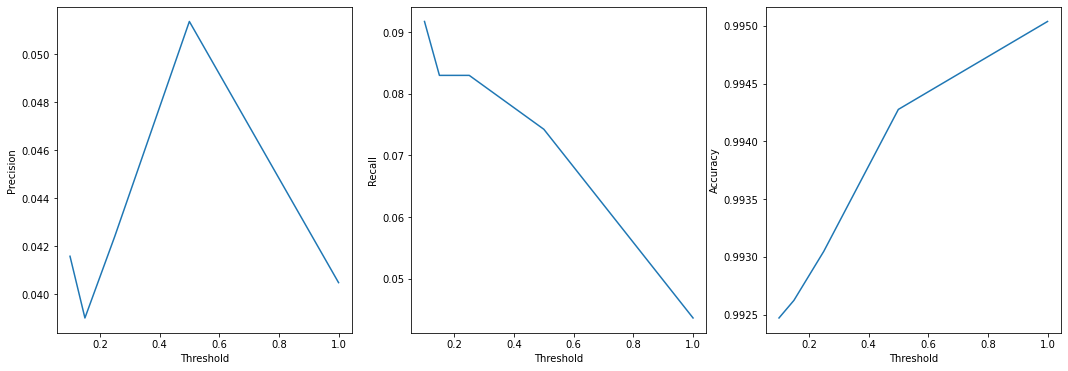

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
#scoring = {'accuracy': make_scorer(accuracy_score),
#           'precision': make_scorer(precision_score),
#           'recall': make_scorer(recall_score)}


def JCfunction(threshold_jc):   #uncomment and complete
    jc_tuples=[]
    jccs=[]
    preds = nx.jaccard_coefficient(G_new)
    for u, v, p in preds:
        jc_tuples.append(tuple((int(u),int(v))))
        jccs.append(p)
        #print(f"({u}, {v}) -> {p:.8f}")
    JCdataframe=pd.DataFrame(jc_tuples,columns=['node1','node2'])
    JCdataframe["Coefficients"]=jccs
    #k=5 AM: 03400145
    #print(f"k=5 επικρατέστεροι σύνδεσμοι:\n {JCdataframe.sort_values(by=['Coefficients'], ascending=False).head(5)}")
    #Metrics section
    JCdataframe['Preds'] = 0
    #set predicted labels by threshold
    JCdataframe.loc[JCdataframe['Coefficients']>=threshold_jc, ['Preds']] = 1
    JCdataframe = JCdataframe.sort_values(by=['node1','node2'])
    #print(JCdataframe.head(100))
    
    #Metric calculation time
    precision_jc = precision_score(dataset2['link'],JCdataframe['Preds'])
    recall_jc = recall_score(dataset2['link'],JCdataframe['Preds'])
    accuracy_jc = accuracy_score(dataset2['link'],JCdataframe['Preds'])
    
    return precision_jc, recall_jc, accuracy_jc; #uncomment and complete

# k = Α.Μ. mod 10
k=5
jc_tuples=[]
jccs=[]
preds = nx.jaccard_coefficient(G_new)
for u, v, p in preds:
    jc_tuples.append(tuple((int(u),int(v))))
    jccs.append(p)
    #print(f"({u}, {v}) -> {p:.8f}")
JCdataframe=pd.DataFrame(jc_tuples,columns=['node1','node2'])
JCdataframe["Coefficients"]=jccs
#k=5 AM: 03400145
print(f"k=5 υψηλότερη τιμή μετρικής:\n {JCdataframe.sort_values(by=['Coefficients'], ascending=False).head(5)}")
thresholds = [0.1, 0.15, 0.25, 0.5, 1.0]
precisions = []
recalls = []
accuracies = []
for threshold in thresholds:
    precision, recall, accuracy = JCfunction(threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    print(f"JC, for threshold: {threshold}, Precision: {precision} Recall: {recall} Accuracy: {accuracy}")

jc_metrics = pd.DataFrame(thresholds, columns=['Threshold'])
jc_metrics['Precision'] = precisions
jc_metrics['Recall'] = recalls
jc_metrics['Accuracy'] = accuracies
#Ενώ το accuracy φαίνεται παραπάνω από ιδανικό, έρχονται τα precision και τα recall για να μας διαψεύσουν
import seaborn as sns

fig, axs = plt.subplots(ncols=3,figsize=(18,6))
sns.lineplot(data=jc_metrics,x='Threshold', y='Precision', ax=axs[0])
sns.lineplot(data=jc_metrics,x='Threshold', y='Recall', ax=axs[1])
sns.lineplot(data=jc_metrics,x='Threshold', y='Accuracy', ax=axs[2])

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

<li><B>3(i).</B> Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση .corr() του Pandas ανά 2 μετρικές, αφότου πάρουμε τις τιμές για κάθε μετρική.

In [5]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
datasetCopy = dataset2.copy()
datasetCopy = dataset2.set_index(['node1', 'node2'])
print(datasetCopy)

             link
node1 node2      
1     2         1
      3         1
      4         1
      6         0
      7         0
...           ...
426   430       0
427   428       0
      429       0
      430       0
429   430       0

[91900 rows x 1 columns]


In [6]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient
jc_tuples=[]
jccs=[]
preds = nx.jaccard_coefficient(G_new)
for u, v, p in preds:
    jc_tuples.append(tuple((int(u),int(v))))
    jccs.append(p)
    #print(f"({u}, {v}) -> {p:.8f}")
JCdataframe=pd.DataFrame(jc_tuples,columns=['node1','node2'])
JCdataframe["Jacc.Coeff"]=jccs
#print(JCdataframe)
JCdataframe = JCdataframe.sort_values(by=['node1','node2'])
#Preferential Attachment
pa_tuples=[]
pacs=[]
preds = nx.preferential_attachment(G_new)
for u, v, p in preds:
    pa_tuples.append(tuple((int(u),int(v))))
    pacs.append(p)
    #print(f"({u}, {v}) -> {p:.8f}")
PAdataframe=pd.DataFrame(pa_tuples,columns=['node1','node2'])
PAdataframe["Pr.Attachment"]=pacs
#print(PAdataframe)
#Resource Allocation
ra_tuples=[]
racs=[]
preds = nx.resource_allocation_index(G_new)
for u, v, p in preds:
    ra_tuples.append(tuple((int(u),int(v))))
    racs.append(p)
    #print(f"({u}, {v}) -> {p:.8f}")
RAdataframe=pd.DataFrame(ra_tuples,columns=['node1','node2'])
RAdataframe["Resource Allocation"]=racs
#print(RAdataframe)

datasetCopy["Jacc.Coeff"] = JCdataframe["Jacc.Coeff"].to_numpy()
datasetCopy["Pr.Attachment"] = PAdataframe["Pr.Attachment"].to_numpy()
datasetCopy["Resource Allocation"] = RAdataframe["Resource Allocation"].to_numpy()
print(datasetCopy)

             link  Jacc.Coeff  Pr.Attachment  Resource Allocation
node1 node2                                                      
1     2         1         0.0              1                  0.0
      3         1         0.0              2                  0.0
      4         1         0.0              1                  0.0
      6         0         0.0              7                  0.0
      7         0         0.0              1                  0.0
...           ...         ...            ...                  ...
426   430       0         0.0              1                  0.0
427   428       0         0.0              2                  0.0
      429       0         0.0              1                  0.0
      430       0         0.0              1                  0.0
429   430       0         1.0              1                  0.5

[91900 rows x 4 columns]


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [7]:
#uncomment whole cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = datasetCopy[['Jacc.Coeff', 'Pr.Attachment', 'Resource Allocation']] .to_numpy() #features, uncomment and complete
y = datasetCopy['link'].to_numpy() #target, uncomment and complete

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) #uncomment and complete

In [8]:
#uncomment whole cell
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [9]:
model.fit(X_train_scaled, y_train)#train the model, uncomment and complete

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [10]:
predictions = model.predict(X_test_scaled)       #uncomment
k=5
for i in range(k+1):
    print(predictions[i]) #get (A.M. last digit) first predictions, uncomment and complete

0
0
0
0
0
0


In [11]:
predict_proba = model.predict_proba(X) #uncomment and complete
datasetCopy['Predict_Proba0'] = predict_proba[:,0]
datasetCopy['Predict_Proba1'] = predict_proba[:,1]
print(datasetCopy.loc[1,47])
#Η πιθανότητα να συνδεθούν οι κόμβοι (1,47) είναι 0.000921

link                   0.000000
Jacc.Coeff             0.000000
Pr.Attachment          1.000000
Resource Allocation    0.000000
Predict_Proba0         0.999286
Predict_Proba1         0.000714
Name: (1, 47), dtype: float64


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [17]:
#install node2vec with conda / pip
from node2vec import Node2Vec   #uncomment
import multiprocessing          #uncomment

#generate walks
node2vec_walker = Node2Vec(G_new, dimensions=128, walk_length=80, num_walks=10 ,workers=4, p=1.0,q=1.0 ) #uncomment and complete

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1) #uncomment and complete

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

In [20]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(dataset2['node1'], dataset2['node2'])]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,dataset2['link'], random_state = 0)  #uncomment and complete

In [25]:
#uncomment whole cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   #uncomment and complete
y_preds= classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_preds))
print("Recall: ",recall_score(y_test,y_preds))
print("Precision:", precision_score(y_test,y_preds))
#Εδώ τα αποτελέσματα είναι πολύ πιο αξιόπιστα

Accuracy:  0.9987812840043525
Recall:  0.5172413793103449
Precision: 1.0


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

In [65]:
#install node2vec with conda / pip
from node2vec import Node2Vec   #uncomment
import multiprocessing          #uncomment

#generate walks
node2vec_walker = Node2Vec(G_new, dimensions=128, walk_length=80, num_walks=10 ,workers=4, p=1.0,q=1.0 ) #uncomment and complete

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1) #uncomment and complete

#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
#x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(dataset2['node1'], dataset2['node2'])]

from node2vec.edges import AverageEmbedder

edges_embs = AverageEmbedder(keyed_vectors=n2v_model.wv)
x = [edges_embs[(str(i),str(j))] for i,j in zip(dataset2['node1'], dataset2['node2'])]
X_train, X_test, y_train, y_test = train_test_split(x,dataset2['link'], random_state = 0)  
#uncomment whole cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   #uncomment and complete
y_preds= classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_preds))
print("Recall: ",recall_score(y_test,y_preds))
print("Precision:", precision_score(y_test,y_preds))

####################################################

from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=n2v_model.wv)
x = [edges_embs[(str(i),str(j))] for i,j in zip(dataset2['node1'], dataset2['node2'])]
X_train, X_test, y_train, y_test = train_test_split(x,dataset2['link'], random_state = 0)  
#uncomment whole cell

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   #uncomment and complete
y_preds= classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_preds))
print("Recall: ",recall_score(y_test,y_preds))
print("Precision:", precision_score(y_test,y_preds))

###################################################################

from node2vec.edges import WeightedL1Embedder

edges_embs = WeightedL1Embedder(keyed_vectors=n2v_model.wv)
x = [edges_embs[(str(i),str(j))] for i,j in zip(dataset2['node1'], dataset2['node2'])]
X_train, X_test, y_train, y_test = train_test_split(x,dataset2['link'], random_state = 0)  
#uncomment whole cell

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   #uncomment and complete
y_preds= classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_preds))
print("Recall: ",recall_score(y_test,y_preds))
print("Precision:", precision_score(y_test,y_preds))

###################################################################

from node2vec.edges import WeightedL2Embedder

edges_embs = WeightedL2Embedder(keyed_vectors=n2v_model.wv)
x = [edges_embs[(str(i),str(j))] for i,j in zip(dataset2['node1'], dataset2['node2'])]
X_train, X_test, y_train, y_test = train_test_split(x,dataset2['link'], random_state = 0)  
#uncomment whole cell

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   #uncomment and complete
y_preds= classifier.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_preds))
print("Recall: ",recall_score(y_test,y_preds))
print("Precision:", precision_score(y_test,y_preds))



Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

Accuracy:  0.9987812840043525
Recall:  0.5172413793103449
Precision: 1.0
Accuracy:  0.9986942328618064
Recall:  0.4827586206896552
Precision: 1.0
Accuracy:  0.9974755168661589
Recall:  0.0
Precision: 0.0


C:\Users\knasiotis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.9974755168661589
Recall:  0.0
Precision: 0.0


C:\Users\knasiotis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Αποτελέσματα

Απ'ότι φαίνεται με τη χρήση του AverageEmbedder βρίσκουμε ίδια αποτελέσματα με την αρχική εκτέλεση του Node2Vec.
Με τη χρήση του Hadamard Embedder βλέπουμε παρόμοιο accuracy και πολύ καλό Precision αλλά βλέπουμε αρκετά λιγότερο ικανοποιητικό Recall score.

Με τους WeightedL1 και WeightedL2 embedders βλέπουμε ασήμαντα χαμηλότερο accuracy. Το μόνο πρόβλημα είναι πως αντιμετώπησα warnings που ίσως αφορούν τη διαδικασία που λειτουργούν οι WeightedL1/L2 Embedders.

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>